# Project #2
##Name: Nick Peters

Proposed Points (out of 25): 24/25

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

With this machine learning experiment, I am tying to solve the problem of classifying different character from the anime One Piece using a convolutional neural network. The dataset I am using contains a total of 11737 images. From my calculations, I determined that 9389 images should be used for training and 2348 images should be used for testing. This will give a 4:1 (or 8:2) train/test split. This dataset comes Kaggle user Ibrahim Serouis 99. The link to the dataset will be below. With this dataset, I am trying to successfully predict 18 different One Piece characters. The list of class include: Ace, Akainu, Brook, Chopper, Crocodile, Franky, Jinbei, Kurohige, Law, Luffy, Mihawk, Nami, Rayleigh, Robin, Sanji, Shanks, Usopp, and Zoro

https://www.kaggle.com/datasets/ibrahimserouis99/one-piece-image-classifier


# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

For my data preparations, all I really have to do is load it to prepare it for training my convolutional neural network. I am certain my data is clean and prepared for use because I had to manually make the train/test split by dragging the image files into their proper places. I made a couple of mistakes by accidentally dragging a batch of images into the incorrect folder, however those mistakes were easy to rectify. Also, since I am using images, there is not much preprocessing to do such as normalization.

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import keras
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the libraries
import keras
import sys
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import sys

In [ ]:
# load and prepare your data here
# dimensions of our images.
img_width = 64
img_height = 64

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/onepiecedata/train' #9389 images
test_data_dir = '/content/drive/MyDrive/onepiecedata/test'   #2348 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32

In [ ]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical') 

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 9397 images belonging to 18 classes.
Found 2348 images belonging to 18 classes.


# 3. Research

Put your code and your experiments here.

In [ ]:
#initial model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Flatten())
model.add(Dense(32)) 
model.add(Dense(18,activation='softmax')) #18 for 18 classes

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
294/294 [==============================] - 5055s 17s/step - loss: 3.2853 - accuracy: 0.1585 - val_loss: 2.5439 - val_accuracy: 0.2181
Epoch 2/10
294/294 [==============================] - 113s 385ms/step - loss: 1.7817 - accuracy: 0.4848 - val_loss: 2.4616 - val_accuracy: 0.2747
Epoch 3/10
294/294 [==============================] - 111s 377ms/step - loss: 0.7121 - accuracy: 0.8239 - val_loss: 2.8598 - val_accuracy: 0.3160
Epoch 4/10
294/294 [==============================] - 110s 375ms/step - loss: 0.2169 - accuracy: 0.9582 - val_loss: 3.3667 - val_accuracy: 0.3190
Epoch 5/10
294/294 [==============================] - 112s 379ms/step - loss: 0.0696 - accuracy: 0.9914 - val_loss: 3.6890 - val_accuracy: 0.3177
Epoch 6/10
294/294 [==============================] - 110s 374ms/step - loss: 0.0432 - accuracy: 0.9943 - val_loss: 4.0226 - val_accuracy: 0.3275
Epoch 7/10
294/294 [==============================] - 109s 372ms/step - loss: 0.0321 - accuracy: 0.9961 - val_loss: 4.4684 - 

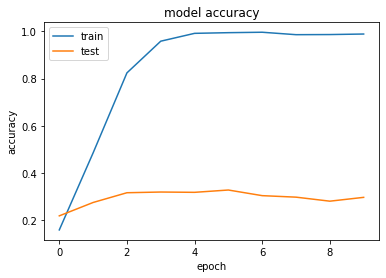

In [ ]:
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#testing how many kernels should be in each layer
nums = [10, 20, 30, 40, 50, 60]
max = 0
val_of_num = 0
val_of_epoch = 0
for x in range(len(nums)):
  model = Sequential()
  model.add(Conv2D(nums[x], (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(Flatten())
  model.add(Dense(32)) 
  model.add(Dense(18,activation='softmax')) #18 for 18 classes

  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
  
  training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )
  
  for i in range(len(training_results.history['val_accuracy'])):
    if (max < training_results.history['val_accuracy'][i]):
      max = training_results.history['val_accuracy'][i]
      val_of_num = nums[x]
      val_of_epoch = i



Epoch 1/5
294/294 [==============================] - 111s 375ms/step - loss: 3.6486 - accuracy: 0.1372 - val_loss: 2.5572 - val_accuracy: 0.2040
Epoch 2/5
294/294 [==============================] - 108s 367ms/step - loss: 1.9159 - accuracy: 0.4477 - val_loss: 2.5131 - val_accuracy: 0.2734
Epoch 3/5
294/294 [==============================] - 109s 372ms/step - loss: 1.0319 - accuracy: 0.7312 - val_loss: 2.7667 - val_accuracy: 0.2828
Epoch 4/5
294/294 [==============================] - 116s 394ms/step - loss: 0.4419 - accuracy: 0.9095 - val_loss: 3.2424 - val_accuracy: 0.2811
Epoch 5/5
294/294 [==============================] - 121s 411ms/step - loss: 0.1757 - accuracy: 0.9732 - val_loss: 3.6694 - val_accuracy: 0.2879
Epoch 1/5
294/294 [==============================] - 110s 372ms/step - loss: 3.2903 - accuracy: 0.1659 - val_loss: 2.5100 - val_accuracy: 0.2466
Epoch 2/5
294/294 [==============================] - 108s 368ms/step - loss: 1.7052 - accuracy: 0.5183 - val_loss: 2.5114 - val_ac

In [ ]:
print("Max: ", max)
print("Number of Kernels: ", val_of_num)
print("Epochs: ", val_of_epoch)

Max:  0.3385860323905945
Number of Kernels:  50
Epochs:  3


In [ ]:
#testing different layer patterns
num = 10
max = 0
depth = 0
val_of_epoch = 0

for x in range(1,num):
  model = Sequential()
  for i in range(1,x):
    model.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
    model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(32)) 
  model.add(Dense(18,activation='softmax')) #18 for 18 classes

  model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
  
  training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )
  
  for i in range(len(training_results.history['val_accuracy'])):
    if (max < training_results.history['val_accuracy'][i]):
      max = training_results.history['val_accuracy'][i]
      depth = x
      val_of_epoch = i

#ValueError: Exception encountered when calling layer "conv2d_27" (type Conv2D).
#My best guess is that it was somewhat caused by the structure that I had generated. I think that there was so much pooling at a certain point that there was nothing for the model to grasp onto.
#I plan on keeping things as is as I do not want to spend too much time on each of these tests since they inherently take a long time. 

KeyboardInterrupt: ignored

In [ ]:
print("Max: ", max)
print("Depth (actual depth may be twice as much if factoring in pooling layers): ", depth)

Max:  0.459114134311676
Depth (actual depth may be twice as much if factoring in pooling layers):  4


##Model #1
The following model is the model which showed the most promise from the previous test. I plan on taking it and training it for 25 epochs. To keep things things from getting out of hand, I plan on only doing this to one other model. In the end, 25 might turn out to be too many or too little for both models; however, it is important to be consistent when doing experiments as to keep results comparable. If I have enough time, I may try training a model on more epochs, but for now 25 should do, especially with how large my dataset is.

In [ ]:
model1 = Sequential()
for i in range(1,4):
  model1.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(32)) 
model1.add(Dense(18,activation='softmax')) #18 for 18 classes

model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 50)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 50)        22550     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 50)         0

In [ ]:
training_results1 = model1.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=25, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/25
294/294 [==============================] - 3310s 11s/step - loss: 2.6937 - accuracy: 0.1506 - val_loss: 2.4905 - val_accuracy: 0.2236
Epoch 2/25
294/294 [==============================] - 107s 363ms/step - loss: 2.2612 - accuracy: 0.2951 - val_loss: 2.4212 - val_accuracy: 0.2832
Epoch 3/25
294/294 [==============================] - 106s 359ms/step - loss: 1.8710 - accuracy: 0.4274 - val_loss: 1.9899 - val_accuracy: 0.4072
Epoch 4/25
294/294 [==============================] - 103s 352ms/step - loss: 1.5383 - accuracy: 0.5330 - val_loss: 1.7919 - val_accuracy: 0.4702
Epoch 5/25
294/294 [==============================] - 104s 353ms/step - loss: 1.2791 - accuracy: 0.6082 - val_loss: 1.7143 - val_accuracy: 0.5013
Epoch 6/25
294/294 [==============================] - 104s 354ms/step - loss: 1.0567 - accuracy: 0.6749 - val_loss: 1.7668 - val_accuracy: 0.5102
Epoch 7/25
294/294 [==============================] - 106s 360ms/step - loss: 0.8768 - accuracy: 0.7291 - val_loss: 1.8066 - 

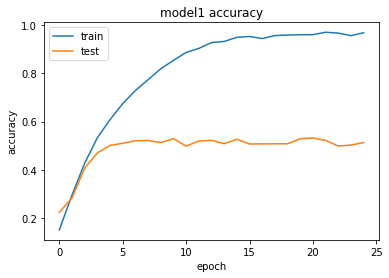

In [ ]:
#A lot better accuracy than before, but I definitely want to try to make it better.
%matplotlib inline
plt.plot(training_results1.history['accuracy'])
plt.plot(training_results1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##More experimentation

In [ ]:
model = Sequential()
for i in range(1,4):
  model.add(Conv2D((50 - 10*i), (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32)) 
model.add(Dense(18,activation='softmax')) #18 for 18 classes

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 40)        1120      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 40)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 30)        10830     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 20)        5420      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 20)        

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

#first set of 5 epochs, need another set to know if this path might be worthwhile.
#Epoch 1/5
#294/294 [==============================] - 3120s 11s/step - loss: 2.7770 - accuracy: 0.1114 - val_loss: 2.6331 - val_accuracy: 0.1780
#Epoch 2/5
#294/294 [==============================] - 106s 362ms/step - loss: 2.4023 - accuracy: 0.2497 - val_loss: 2.3664 - val_accuracy: 0.2624
#Epoch 3/5
#294/294 [==============================] - 102s 346ms/step - loss: 2.1166 - accuracy: 0.3405 - val_loss: 2.1617 - val_accuracy: 0.3467
#Epoch 4/5
#294/294 [==============================] - 104s 353ms/step - loss: 1.8564 - accuracy: 0.4302 - val_loss: 2.1354 - val_accuracy: 0.3680
#Epoch 5/5
#294/294 [==============================] - 106s 361ms/step - loss: 1.6794 - accuracy: 0.4844 - val_loss: 2.0445 - val_accuracy: 0.4003

#second set
#Epoch 1/5
#294/294 [==============================] - 104s 353ms/step - loss: 1.5113 - accuracy: 0.5387 - val_loss: 1.9744 - val_accuracy: 0.4170
#Epoch 2/5
#294/294 [==============================] - 115s 393ms/step - loss: 1.3727 - accuracy: 0.5847 - val_loss: 1.8878 - val_accuracy: 0.4459
#Epoch 3/5
#294/294 [==============================] - 103s 351ms/step - loss: 1.2624 - accuracy: 0.6121 - val_loss: 1.8989 - val_accuracy: 0.4553
#Epoch 4/5
#294/294 [==============================] - 102s 347ms/step - loss: 1.1623 - accuracy: 0.6421 - val_loss: 1.9295 - val_accuracy: 0.4549
#Epoch 5/5
#294/294 [==============================] - 104s 355ms/step - loss: 1.0821 - accuracy: 0.6672 - val_loss: 1.9115 - val_accuracy: 0.4621

#there's indication that there might be a plateau, this will not be the avenue I will go down.
#third set below

Epoch 1/5
294/294 [==============================] - 104s 353ms/step - loss: 1.0074 - accuracy: 0.6911 - val_loss: 2.0255 - val_accuracy: 0.4570
Epoch 2/5
294/294 [==============================] - 104s 354ms/step - loss: 0.9266 - accuracy: 0.7142 - val_loss: 2.0248 - val_accuracy: 0.4744
Epoch 3/5
294/294 [==============================] - 101s 344ms/step - loss: 0.8746 - accuracy: 0.7262 - val_loss: 2.0844 - val_accuracy: 0.4570
Epoch 4/5
294/294 [==============================] - 101s 345ms/step - loss: 0.7890 - accuracy: 0.7580 - val_loss: 2.1349 - val_accuracy: 0.4608
Epoch 5/5
294/294 [==============================] - 102s 346ms/step - loss: 0.7473 - accuracy: 0.7673 - val_loss: 2.3073 - val_accuracy: 0.4459


In [ ]:
model = Sequential()
for i in range(1,4):
  model.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32)) 
model.add(Dense(18,activation='softmax')) #18 for 18 classes

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 50)        1400      
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 50)        22550     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 50)        22550     
                                                                 
 conv2d_18 (Conv2D)          (None, 26, 26, 50)        22550     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 50)       0         
 g2D)                                                 

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )



#Epoch 1/10
#294/294 [==============================] - 104s 351ms/step - loss: 2.8287 - accuracy: 0.0906 - val_loss: 2.7856 - val_accuracy: 0.1261
#Epoch 2/10
#294/294 [==============================] - 102s 347ms/step - loss: 2.6850 - accuracy: 0.1496 - val_loss: 2.6683 - val_accuracy: 0.1610
#Epoch 3/10
#294/294 [==============================] - 104s 354ms/step - loss: 2.5284 - accuracy: 0.2058 - val_loss: 2.5092 - val_accuracy: 0.2036
#Epoch 4/10
#294/294 [==============================] - 102s 348ms/step - loss: 2.2784 - accuracy: 0.2891 - val_loss: 2.3286 - val_accuracy: 0.2734
#Epoch 5/10
#294/294 [==============================] - 102s 347ms/step - loss: 2.0242 - accuracy: 0.3679 - val_loss: 2.2723 - val_accuracy: 0.3147
#Epoch 6/10
#294/294 [==============================] - 105s 356ms/step - loss: 1.8376 - accuracy: 0.4234 - val_loss: 2.0946 - val_accuracy: 0.3484
#Epoch 7/10
#294/294 [==============================] - 102s 347ms/step - loss: 1.6430 - accuracy: 0.4840 - val_loss: 2.0782 - val_accuracy: 0.3731
#Epoch 8/10
#294/294 [==============================] - 102s 346ms/step - loss: 1.4859 - accuracy: 0.5323 - val_loss: 2.1159 - val_accuracy: 0.3790
#Epoch 9/10
#294/294 [==============================] - 104s 353ms/step - loss: 1.3083 - accuracy: 0.5884 - val_loss: 2.1456 - val_accuracy: 0.3957
#Epoch 10/10
#94/294 [==============================] - 102s 346ms/step - loss: 1.1601 - accuracy: 0.6313 - val_loss: 2.1808 - val_accuracy: 0.4063

#This variation shows promise. I may choose this one to train furter, however, I want to do a few more tests.

Epoch 1/5
294/294 [==============================] - 107s 363ms/step - loss: 0.9892 - accuracy: 0.6889 - val_loss: 2.2519 - val_accuracy: 0.4135
Epoch 2/5
294/294 [==============================] - 103s 350ms/step - loss: 0.8327 - accuracy: 0.7378 - val_loss: 2.3586 - val_accuracy: 0.4302
Epoch 3/5
294/294 [==============================] - 113s 385ms/step - loss: 0.7112 - accuracy: 0.7680 - val_loss: 2.6011 - val_accuracy: 0.4250
Epoch 4/5
294/294 [==============================] - 106s 359ms/step - loss: 0.5873 - accuracy: 0.8125 - val_loss: 2.6631 - val_accuracy: 0.4323
Epoch 5/5
294/294 [==============================] - 108s 366ms/step - loss: 0.4863 - accuracy: 0.8413 - val_loss: 3.1586 - val_accuracy: 0.4135


In [ ]:
model = Sequential()
for i in range(1,4):
  model.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(Dropout(.2, input_shape=(2,)))
  model.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32)) 
model.add(Dense(18,activation='softmax')) #18 for 18 classes

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 62, 62, 50)        1400      
                                                                 
 dropout (Dropout)           (None, 62, 62, 50)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 50)        22550     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 30, 30, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 50)        22550     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 50)        0         
                                                      

In [ ]:
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
294/294 [==============================] - 111s 374ms/step - loss: 2.8511 - accuracy: 0.0720 - val_loss: 2.8051 - val_accuracy: 0.0873
Epoch 2/10
294/294 [==============================] - 104s 353ms/step - loss: 2.7212 - accuracy: 0.1314 - val_loss: 2.6782 - val_accuracy: 0.1606
Epoch 3/10
294/294 [==============================] - 104s 355ms/step - loss: 2.5724 - accuracy: 0.1931 - val_loss: 2.5029 - val_accuracy: 0.2181
Epoch 4/10
294/294 [==============================] - 106s 363ms/step - loss: 2.3544 - accuracy: 0.2693 - val_loss: 2.2769 - val_accuracy: 0.3198
Epoch 5/10
294/294 [==============================] - 104s 355ms/step - loss: 2.1267 - accuracy: 0.3395 - val_loss: 2.1861 - val_accuracy: 0.3416
Epoch 6/10
294/294 [==============================] - 108s 367ms/step - loss: 1.8982 - accuracy: 0.4111 - val_loss: 2.0227 - val_accuracy: 0.3927
Epoch 7/10
294/294 [==============================] - 105s 356ms/step - loss: 1.7386 - accuracy: 0.4600 - val_loss: 1.9193 -

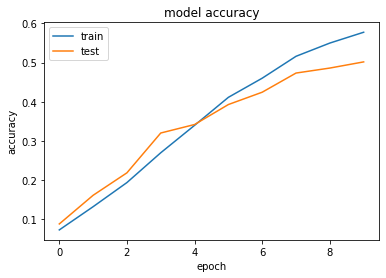

In [ ]:
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#probably the best results yet, this is the model I will train for longer.

##Model #2


In [ ]:
model2 = Sequential()
for i in range(1,4):
  model2.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model2.add(Dropout(.2, input_shape=(2,)))
  model2.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(32)) 
model2.add(Dense(18,activation='softmax')) #18 for 18 classes

model2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 
print(model2.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 62, 62, 50)        1400      
                                                                 
 dropout_9 (Dropout)         (None, 62, 62, 50)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 60, 60, 50)        22550     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 50)        22550     
                                                                 
 dropout_10 (Dropout)        (None, 28, 28, 50)        0         
                                                      

In [ ]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=25, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/25
294/294 [==============================] - 109s 368ms/step - loss: 2.8683 - accuracy: 0.0650 - val_loss: 2.7604 - val_accuracy: 0.1099
Epoch 2/25
294/294 [==============================] - 104s 355ms/step - loss: 2.7038 - accuracy: 0.1294 - val_loss: 2.6597 - val_accuracy: 0.1644
Epoch 3/25
294/294 [==============================] - 106s 361ms/step - loss: 2.5589 - accuracy: 0.1931 - val_loss: 2.6314 - val_accuracy: 0.1708
Epoch 4/25
294/294 [==============================] - 104s 355ms/step - loss: 2.4206 - accuracy: 0.2471 - val_loss: 2.4500 - val_accuracy: 0.2445
Epoch 5/25
294/294 [==============================] - 104s 354ms/step - loss: 2.2407 - accuracy: 0.3022 - val_loss: 2.3184 - val_accuracy: 0.2960
Epoch 6/25
294/294 [==============================] - 106s 360ms/step - loss: 2.0923 - accuracy: 0.3545 - val_loss: 2.1878 - val_accuracy: 0.3403
Epoch 7/25
294/294 [==============================] - 103s 350ms/step - loss: 1.9122 - accuracy: 0.4094 - val_loss: 2.0522 -

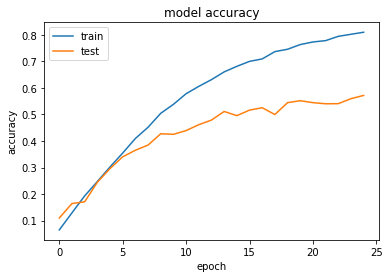

In [ ]:
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#I am feeling like the learning rate could really use some decay, so I plan on adding that and running this model for longer.
#This will be my last attempt to get a better result.

In [ ]:
model2_5 = Sequential()
optimizer = tf.keras.optimizers.Adam(decay=0.0001)
for i in range(1,4):
  model2_5.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model2_5.add(Dropout(.2, input_shape=(2,)))
  model2_5.add(Conv2D(50, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
  model2_5.add(MaxPooling2D())
model2_5.add(Flatten())
model2_5.add(Dense(32)) 
model2_5.add(Dense(18,activation='softmax')) #18 for 18 classes

model2_5.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 
print(model2_5.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 50)        1400      
                                                                 
 dropout_3 (Dropout)         (None, 62, 62, 50)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 50)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 50)        0         
                                                      

In [ ]:
training_results2_5 = model2_5.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/20
294/294 [==============================] - 109s 371ms/step - loss: 0.2890 - accuracy: 0.9039 - val_loss: 2.0780 - val_accuracy: 0.5669
Epoch 2/20
294/294 [==============================] - 107s 363ms/step - loss: 0.2911 - accuracy: 0.9025 - val_loss: 2.1013 - val_accuracy: 0.5784
Epoch 3/20
294/294 [==============================] - 106s 362ms/step - loss: 0.2670 - accuracy: 0.9069 - val_loss: 2.2014 - val_accuracy: 0.5750
Epoch 4/20
294/294 [==============================] - 109s 370ms/step - loss: 0.2659 - accuracy: 0.9105 - val_loss: 2.2937 - val_accuracy: 0.5635
Epoch 5/20
294/294 [==============================] - 106s 361ms/step - loss: 0.2559 - accuracy: 0.9145 - val_loss: 2.1809 - val_accuracy: 0.5681
Epoch 6/20
294/294 [==============================] - 105s 359ms/step - loss: 0.2431 - accuracy: 0.9162 - val_loss: 2.2664 - val_accuracy: 0.5622
Epoch 7/20
294/294 [==============================] - 108s 366ms/step - loss: 0.2205 - accuracy: 0.9257 - val_loss: 2.2411 -

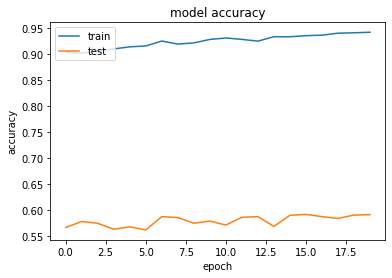

In [ ]:
%matplotlib inline
plt.plot(training_results2_5.history['accuracy'])
plt.plot(training_results2_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#total epochs = 60

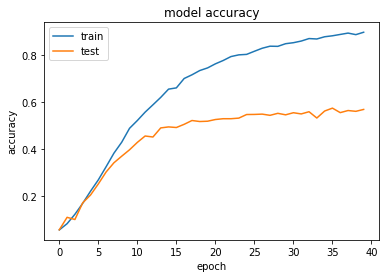

Above is the first 40 epochs of training. The model seems to be still improving by the extra 20 epochs I gave it; however, it does not seem to be by too much. I think that the model could at most improve by about 1%-5%. Because of time constraints, I will leave it at this amount of training.

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I discovered that neither model I developed performed particularly well, but model2_5 did perform the best without overfitting. From the amount of epochs I gave model1, one can definitely see some overfitting, as the model does not particularly improve and rather just plateaus. I definitely wish I had given my original model2 more epochs, because it may have ended outperforming the second version. What I find particularly interesting is how, when I was watching some models train, when I thought they might plateau ended up not being a plateau at all. The model that worked the absolulte worst was my first test model, which only had one hidden layer. This is not surprisings as my data is fairly complex, with some characters wearing varying outifts. As such a more complex model would be necessary. The next worst model is model1, which was still able to do decently well. I think this model did not do as well as other models because its structure was still a bit too simple to grasp some patterns in the data. As said before, model2_5 is my best model. I think that a lot of the improvement in 2 and 2_5 came from adding a droupout layer in between two convolutional layers. By doing this, I think that the different layers were able to learn different and significant details that allowed the models to perform slightly better than model1.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I did not encounter a ton of challenges, but probably the biggest challenge I faced in this project was having to manually make the train/test split. This was something that I had never done before, so that in itself made it a challenge. I knew that it was a challenge that was completely within my abilities, because I wasted no time making calculations and getting the split made. Because of my calculations, I was able to drag the correct amount of images into the test folders. After this, could drag the rest of the images into their proper train folder. Since the images were already divided into their classes, it made this process slightly easier. What ended up being the biggest challenge of this process is the fact that there was no particularly easy way to complete the process, so it was inherently time-consuming.

Another challenge I faced was that I had to be smart with my time since training was an inherently time-consuming activity. I had to know when to move on and when it was right to do more training. In some ways, I was good at this, as it led me to move on when I thought one experiment was unfruitful. In other ways, I was not good at this, as I did not give model2 more time, which, looking back, I think it definitely could use. In the end though, the lack of time has ended up being a limiting factor for this project. As such, I have to be happy that I was able to achieve a model that improved from model1, however little that was.